# What is the best Pittsburgh neighborhood?

![pittsburgh-gif](https://media.giphy.com/media/EBZZxeGUKuO4dfDJyw/giphy.gif)

### Data Sources

Arrest Data Source: https://data.wprdc.org/dataset/arrest-data

Education Data Source: https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/755c09dc-be92-4787-84a6-080d84345979

Health Data Source: https://data.wprdc.org/dataset/median-age-death

## Introduction

The task at hand was to analyze several data sets and determine the "best" overall neighborhood in Pittsburgh supported by our analysis. To determine the "best" neighborhood, we analyzed datasets from the Western Pennsylvannia Regional Data Center relating to health, education, and safety. There are many subjective factors that may be used to determine the "best" neighborhood, however, our group selected what we felt were most important.

## Our Metric

The metric our group used to determine the best neighborhood in Pittsburgh was quality of life. Although quality of life may be defined by different metrics, we believe education, health, and safety are critical factors in determining a person or family's quality of life in a neighborhood. To get a comprehensive understanding on quality of life, our group analyzed data sets on level of educational attainment, number of arrests, and life expectancy per neighborhood of Pittsburgh.

# Our Data Analysis

In [2]:
import pandas as pd
import numpy as np

Here we are loading in the data from our sources and saving them into variables for easy access

In [3]:
ArrestData = pd.read_csv("ArrestData.csv", index_col="_id")
edu = pd.read_csv("edu.csv", index_col="Id")
HealthData = pd.read_csv("HealthData.csv")

To get an idea for each data set, lets print out the first 5 rows of each set:

In [4]:
#Arrest data
ArrestData.head(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,,
1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [5]:
edu.head(5)

,Neighborhood,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,Margin of Error; Total: - Kindergarten,Estimate; Total: - 1st grade,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school degree,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
Id,,,,,,,,,,,,,,,,,,,,,
1,Allegheny Center,791.0,140.000000,7.0,11.000000,0.0,10.000000,0.0,10.000000,0.0,...,53.0,38.000000,176.0,73.000000,74.0,66.000000,88.0,50.000000,6.0,9.000000
2,Allegheny West,283.0,92.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,...,25.0,19.000000,121.0,61.000000,12.0,13.000000,13.0,16.000000,6.0,9.000000
3,Allentown,1611.0,247.786198,14.0,24.494897,0.0,17.320508,0.0,17.320508,6.0,...,59.0,43.046487,72.0,50.049975,38.0,28.635642,30.0,29.748950,0.0,17.320508
4,Arlington,1271.0,224.512806,37.0,39.560081,0.0,17.320508,0.0,17.320508,0.0,...,124.0,54.378304,84.0,46.173586,13.0,13.038405,2.0,14.696938,0.0,17.320508
5,Arlington Heights,182.0,108.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000


In [6]:
HealthData.head(5)

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0,0.0,0.0,0.0
1,CHATEAU,0.0,0.0,2.0,NaN,2.0,NaN
2,NORTH SHORE,0.0,0.0,4.0,NaN,5.0,80.0
3,ALLEGHENY WEST,3.0,NaN,4.0,NaN,8.0,65.0
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5


Seeing our raw data, we will need to do some "cleaning" that will involve dropping null values, renaming columns, and excluding irrelevant or unncessary data points

## Arrest Data 

                         arrests
east carnegie                 48
swisshelm park                40
chartiers city                40
new homestead                 39
regent square                 35
ridgemont                     35
central northside             23
mt. oliver boro               18
troy hill-herrs island         6
mt. oliver neighborhood        2


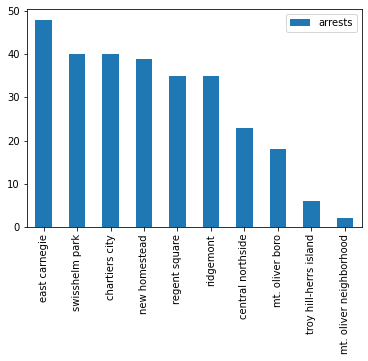

In [7]:
# Cleaning and reformatting the arrest data set:
neighborhood_df = ArrestData.filter(['INCIDENTNEIGHBORHOOD'], axis=1)
neighborhood_df = neighborhood_df.rename(columns={'INCIDENTNEIGHBORHOOD': 'NEIGHBORHOODS'})
neighborhood_df = neighborhood_df.dropna()
neighborhood_df['NEIGHBORHOODS'] = neighborhood_df['NEIGHBORHOODS'].str.lower()
arrests_count = dict()
for row in neighborhood_df['NEIGHBORHOODS']:
    neighborhood = row[0:]
    if neighborhood not in arrests_count:
        arrests_count[neighborhood] = 1
    else:
        arrests_count[neighborhood] += 1
arrests_count

arrests_df = pd.DataFrame.from_dict(arrests_count, orient='index')
arrests_df = arrests_df[0].sort_values(ascending=False)
lowArrest = pd.DataFrame(arrests_df.tail(10))
lowArrest.columns = ['arrests']
print(lowArrest)
lowArrest.plot(kind='bar')

## Life Expectancy Data

                       TOTALdeaths*  TOTAL MD AGE AT DEATH
NEIGHBORHOOD                                              
squirrel hill south           802.0                   85.9
north oakland                 279.0                   85.6
banksville                    253.0                   85.5
point breeze                  175.0                   85.1
squirrel hill north           242.0                   85.0
overbrook                     289.0                   82.2
shadyside                     406.0                   82.1
upper hill                    191.0                   81.7
central lawrenceville         358.0                   81.3
stanton heights               278.0                   80.5


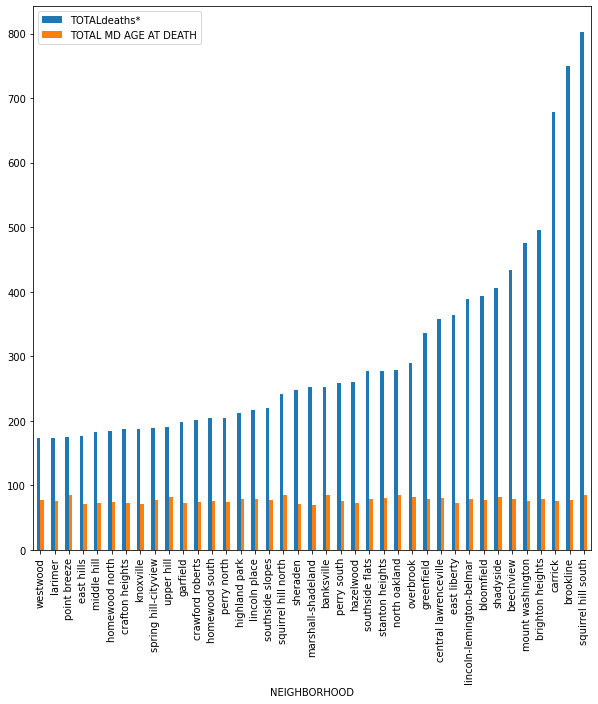

In [8]:
data_set = HealthData.set_index("NEIGHBORHOOD")
data_set=data_set.drop(["BLACKdeaths", "Black MD AGE AT DEATH", "WHITEdeaths", "White MD AGE AT DEATH"], axis=1)
data_set['TOTALdeaths*'].mean()
data_set.index = data_set.index.str.lower()
death_QM = data_set[data_set['TOTALdeaths*'] > 171 ]
sorted_death = death_QM.sort_values(by=['TOTAL MD AGE AT DEATH'], ascending = False)
print(sorted_death.head(10))
death_QM.plot(kind = "bar", figsize = (10, 10))

## Education Attainment Data

In [15]:
edu = pd.read_csv("edu.csv", index_col = "Neighborhood")

edu['eighth_below'] = edu['Estimate; Total: - Nursery school'] + edu['Estimate; Total: - Kindergarten'] + edu['Estimate; Total: - 1st grade'] + edu['Estimate; Total: - 2nd grade'] + edu['Estimate; Total: - 3rd grade'] + edu['Estimate; Total: - 4th grade'] + edu['Estimate; Total: - 5th grade'] + edu['Estimate; Total: - 6th grade'] + edu['Estimate; Total: - 7th grade'] + edu['Estimate; Total: - 8th grade']
temp = edu[['Estimate; Total: - Nursery school', 'Estimate; Total: - Kindergarten', 'Estimate; Total: - 1st grade', 'Estimate; Total: - 2nd grade', 'Estimate; Total: - 3rd grade', 'Estimate; Total: - 4th grade', 'Estimate; Total: - 5th grade', 'Estimate; Total: - 6th grade', 'Estimate; Total: - 7th grade', 'Estimate; Total: - 8th grade', 'eighth_below']]
temp.head(10)

edu['some_highschool'] = edu['Estimate; Total: - 9th grade'] + edu['Estimate; Total: - 10th grade'] + edu['Estimate; Total: - 11th grade'] + edu['Estimate; Total: - 12th grade, no diploma']
temp = edu[['Estimate; Total: - 9th grade', 'Estimate; Total: - 10th grade', 'Estimate; Total: - 11th grade', 'Estimate; Total: - 12th grade, no diploma', 'some_highschool']]
temp.head(10)

edu['highschool'] =  edu['Estimate; Total: - Regular high school diploma']+edu['Estimate; Total: - GED or alternative credential']
temp = edu[['Estimate; Total: - Regular high school diploma', 'Estimate; Total: - GED or alternative credential', 'highschool']]
temp.head(10)

edu['some_college'] = edu['Estimate; Total: - Some college, less than 1 year'] + edu['Estimate; Total: - Some college, 1 or more years, no degree']
temp = edu[['Estimate; Total: - Some college, less than 1 year', 'Estimate; Total: - Some college, 1 or more years, no degree', 'some_college']]
temp.head(10)

edu['assoc_above'] = edu['Estimate; Total: - Associate\'s degree'] + edu['Estimate; Total: - Bachelor\'s degree'] + edu['Estimate; Total: - Master\'s degree'] + edu['Estimate; Total: - Professional school degree'] + edu['Estimate; Total: - Doctorate degree']
temp = edu[['Estimate; Total: - Associate\'s degree', 'Estimate; Total: - Bachelor\'s degree', 'Estimate; Total: - Master\'s degree', 'Estimate; Total: - Professional school degree', 'Estimate; Total: - Doctorate degree', 'assoc_above']]
temp.head(10)

edu['eighth_below_per'] = (edu['eighth_below']/edu['Estimate; Total:'])*100
edu['some_highschool_per'] = (edu['some_highschool']/edu['Estimate; Total:'])*100
edu['highschool_per'] = (edu['highschool']/edu['Estimate; Total:'])*100
edu['some_college_per'] = (edu['some_college']/edu['Estimate; Total:'])*100
edu['assoc_above_per'] = (edu['assoc_above']/edu['Estimate; Total:'])*100
edu['total_population'] = edu['Estimate; Total:']


edu_new = edu.loc[:, ['total_population', 'eighth_below_per',  'some_highschool_per', 'highschool_per','some_college_per',  'assoc_above_per']]
edu_new.index = edu_new.index.str.lower()


In [16]:
edu_new.sort_values('highschool_per', ascending=False).head(10)

,total_population,eighth_below_per,some_highschool_per,highschool_per,some_college_per,assoc_above_per
Neighborhood,,,,,,
west end,112.0,0.000000,0.000000,58.928571,11.607143,29.464286
esplen,235.0,0.000000,5.106383,57.872340,22.553191,14.468085
bedford dwellings,674.0,1.483680,14.243323,53.560831,16.617211,10.979228
windgap,1026.0,0.877193,3.801170,52.534113,22.807018,18.810916
allentown,1611.0,0.993172,5.834885,50.900062,29.050279,12.352576
mt. oliver,381.0,0.000000,1.574803,50.393701,20.997375,25.196850
hays,277.0,0.000000,5.776173,49.819495,19.494585,24.909747
lincoln place,2565.0,0.000000,7.368421,48.927875,15.516569,26.432749
spring hill-city view,1615.0,3.095975,9.721362,48.854489,12.383901,25.201238


In [17]:
edu_new.sort_values('some_college_per', ascending=False).head(10)

,total_population,eighth_below_per,some_highschool_per,highschool_per,some_college_per,assoc_above_per
Neighborhood,,,,,,
east hills,1852.0,0.000000,9.179266,39.362851,32.775378,18.196544
garfield,2330.0,1.158798,11.416309,34.721030,32.446352,19.742489
ridgemont,246.0,0.000000,12.195122,19.512195,30.487805,37.804878
allentown,1611.0,0.993172,5.834885,50.900062,29.050279,12.352576
manchester,1415.0,0.636042,5.229682,20.989399,28.621908,42.897527
middle hill,1293.0,4.176334,16.009281,32.018561,27.996906,18.020108
homewood north,1775.0,2.873239,9.295775,35.154930,26.985915,24.676056
chartiers city,356.0,0.000000,10.674157,35.112360,26.685393,27.528090
south oakland,1256.0,1.433121,3.821656,21.735669,26.114650,42.993631


In [22]:
sorted_neighborhoods = edu_new.sort_values('assoc_above_per', ascending=False).head(10)
print(sorted_neighborhoods)

                     total_population  eighth_below_per  some_highschool_per  \
Neighborhood                                                                   
south shore                       8.0          0.000000             0.000000   
strip district                  611.0          0.000000             0.000000   
shadyside                      9414.0          1.041003             0.966645   
squirrel hill north            5494.0          0.964689             0.910084   
regent square                   774.0          0.000000             1.808786   
point breeze                   4022.0          0.795624             1.268026   
north shore                     159.0          0.000000             0.000000   
point breeze north             1527.0          0.000000             0.851343   
squirrel hill south           11164.0          0.850949             1.728771   
north oakland                  2937.0          0.817160             5.107252   

                     highschool_per  so

Here, we isolate only the bar that measures the number of residents with an associates degree and above since this is we're interested in.

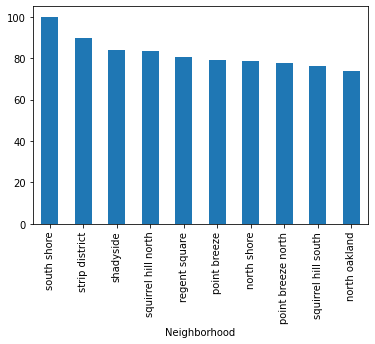

In [27]:
sorted_neighborhoods['assoc_above_per'].plot.bar()

# Conclusion

In [10]:
#Lower case each neighborhood to correlate with the format of other data sets
final_data = pd.concat([arrests_df, sorted_death['TOTAL MD AGE AT DEATH'], edu_new['assoc_above_per']], axis=1)
final_data = final_data.rename(columns={final_data.columns[0]: 'NUM of arrests'})
final_data = final_data.dropna()
final_data.tail(15)

,NUM of arrests,TOTAL MD AGE AT DEATH,assoc_above_per
garfield,661.0,73.5,19.742489
perry north,567.0,74.6,44.203911
crafton heights,545.0,73.5,32.764098
highland park,529.0,79.2,66.153188
greenfield,496.0,79.2,52.872957
central lawrenceville,415.0,81.3,44.610061
north oakland,408.0,85.6,73.544433
upper hill,340.0,81.7,36.121392
overbrook,294.0,82.2,29.865057
point breeze,287.0,85.1,79.288911


#### Merging our data sets togethers, we see that Squirrel Hill North has a relatively low number of arrests, compared to other neighborhoods where arrests > 1000, high life expectancy of about 85 years old, and an educated population. As a result, we have reached the conclusion that Squirrel Hill North is the best neighborhood in Pittsburgh!

Brandon: "I personally like the neighborhood of East Liberty for its restaurants, walkable neighborhood, and urban design. However, I have visted Squirrel Hill a few times and am not surprised that it is one of the best neighborhoods in Pittsburgh by our metric. Squirrel Hill is home to some of the best Thai food and also an inexpensive threatre!"

Aishwarya: "My favorite neighborhood in Pittsburgh is the Strip District because of it's vast variety of stores whether it be the different markets, clothing stores to shop at, or stores to buy groceries at, which allows for the several different needs of people in Pittsburgh when they are within this neighborhood. This is mostly similar from our group finding that Squirrel Hill is the best neighborhood because there are overlapping factors based on its ability to statisfy those living in Pittsburgh."

Asliddin: "I thought that Shadyside would be the best neighborhood, but it turns out to be Squirrel Hill North."

![Squirrel Hill](https://media.giphy.com/media/1G98f6vVdLOZj2nVvR/giphy.gif)